### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [59]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import *
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Cargamos el dataframe

In [60]:
data = {'Nombres': ['Alba', 'Juanmi', 'Ricardo', 'Cristina', 'Dustin', 'Cassandra', 'Fernando', 'Jose', 'Carlos', 'Javi', 'Rocio', 'Bea', 'Ayah'], 
        'Edades': [23, 45, 39, 36, 33, 31, 29, 29, 29, 29, 29, 23, 21], 
        'Altura': [168, 179, 177, 170, 183, 173, 175, 177, 178, 175, 163, 167, 161]}

In [61]:
df_clase = pd.DataFrame(data)
df_clase

,Nombres,Edades,Altura
0,Alba,23,168
1,Juanmi,45,179
2,Ricardo,39,177
3,Cristina,36,170
4,Dustin,33,183
5,Cassandra,31,173
6,Fernando,29,175
7,Jose,29,177
8,Carlos,29,178
9,Javi,29,175


# Vemos la dispersion de los datos

<Axes: ylabel='Altura'>

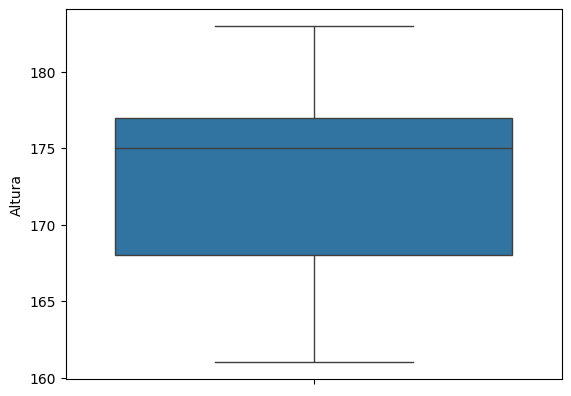

In [62]:
sns.boxplot(df_clase['Altura'])

<Axes: ylabel='Edades'>

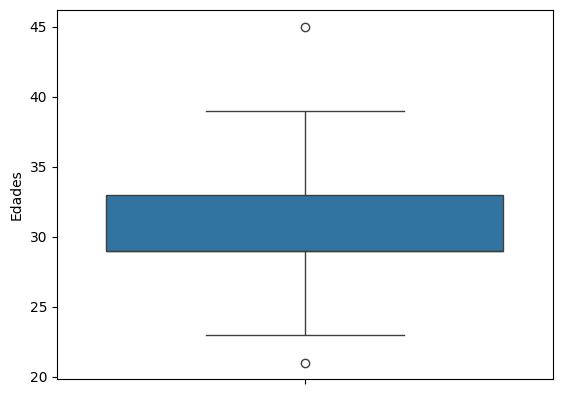

In [63]:
sns.boxplot(df_clase['Edades'])

# Comprensión de las variables

In [64]:
# Estadísticos
df_clase.describe(include='all')

# Tipos de los datos
df_clase.dtypes

# Tipos de los datos y missings
df_clase.info()

# Columnas del dataset
df_clase.columns

# dimensiones del dataset
print("Filas:", df_clase.shape[0])
print("Columnas:", df_clase.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nombres  13 non-null     object
 1   Edades   13 non-null     int64 
 2   Altura   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes
Filas: 13
Columnas: 3


In [65]:
df_clase.describe()

,Edades,Altura
count,13.000000,13.000000
mean,30.461538,172.769231
std,6.666026,6.546677
min,21.000000,161.000000
25%,29.000000,168.000000
50%,29.000000,175.000000
75%,33.000000,177.000000
max,45.000000,183.000000


# Dividimos en Train y Test y creamos el Target

In [66]:
# Calcula el promedio de altura para personas mayores de 30 años
#promedio_altura_mayores_30 = df_clase[df_clase['Edades'] >= 30]['Altura'].mean()
#promedio_altura_mayores_30

In [67]:
# Crea una columna de destino (target) basada en la relación entre edad y altura
#df_clase['target'] = df_clase.apply(lambda row: row['Altura'] > promedio_altura_mayores_30, axis=1)
#df_clase

In [70]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop(['Nombres', 'Altura'], axis=1),  # Excluye las columnas 'Nombres' y 'Altura' --> Es la X
    df_clase['Altura'], #Este es el target. Es la Y
    test_size=0.2,
    random_state=42
)

In [71]:
# Muestra los conjuntos resultantes
print("Conjunto de entrenamiento:")
print(X_train)
print("\nConjunto de prueba:")
print(X_test)
print("\nEtiquetas de entrenamiento:")
print(y_train)
print("\nEtiquetas de prueba:")
print(y_test)

Conjunto de entrenamiento:
    Edades
8       29
5       31
2       39
1       45
12      21
4       33
7       29
10      29
3       36
6       29

Conjunto de prueba:
    Edades
11      23
9       29
0       23

Etiquetas de entrenamiento:
8     178
5     173
2     177
1     179
12    161
4     183
7     177
10    163
3     170
6     175
Name: Altura, dtype: int64

Etiquetas de prueba:
11    167
9     175
0     168
Name: Altura, dtype: int64


# Analisis bivariante --> Correlaciones

<Axes: >

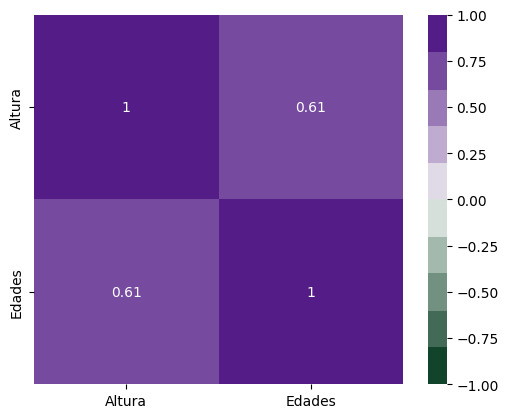

In [72]:
df_clase_num = df_clase[['Altura', 'Edades']]
sns.heatmap(df_clase_num.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True)


# Construimos el modelo de Regresión lineal

1. Crea un modelo de regresión lineal.
2. Parte los datos en conjuntos de entrenamiento y test.
3. Entrenamis el modelo. Mostramos los parametros del modelo.
4. Realizamos una predicción con los datos de test

In [73]:
# 1. Creamos un modelo de regresión lineal
modelo_regresion = LinearRegression()

In [74]:
# Mostramos los conjuntos resultantes
print("Conjunto de entrenamiento:")
print(X_train)
print("\nConjunto de prueba:")
print(X_test)

Conjunto de entrenamiento:
    Edades
8       29
5       31
2       39
1       45
12      21
4       33
7       29
10      29
3       36
6       29

Conjunto de prueba:
    Edades
11      23
9       29
0       23


In [75]:
print("\nEtiquetas de entrenamiento:")
print(y_train)
print("\nEtiquetas de prueba:")
print(y_test)


Etiquetas de entrenamiento:
8     178
5     173
2     177
1     179
12    161
4     183
7     177
10    163
3     170
6     175
Name: Altura, dtype: int64

Etiquetas de prueba:
11    167
9     175
0     168
Name: Altura, dtype: int64


In [76]:
# 3. Entrenamos el modelo
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [77]:
# Mostramos los parámetros del modelo
print(f"Coeficientes del modelo: {modelo_regresion.coef_}")
print(f"Intercepto del modelo: {modelo_regresion.intercept_}")

Coeficientes del modelo: [0.59149911]
Intercepto del modelo: 154.61287859506234


In [78]:
# 4. Realizamos una predicción con los datos de prueba
predicciones = modelo_regresion.predict(X_test)
predicciones

array([168.21735811, 171.76635276, 168.21735811])

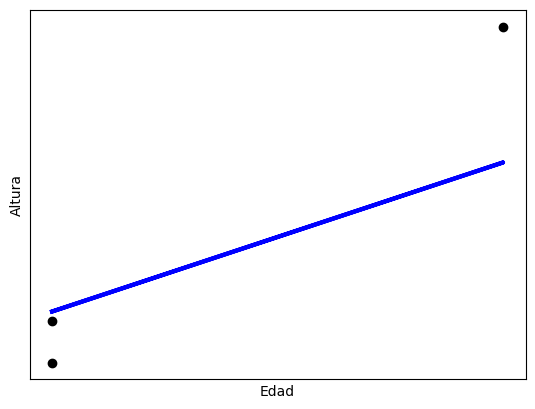

In [79]:
# Visualizamos los resultados en un gráfico de dispersión y la línea de regresión
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, predicciones, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("Edad")
plt.ylabel("Altura")
plt.show()

In [80]:
# Imprimimos los coeficientes de la regresión
modelo_regresion = modelo_regresion.coef_
print("Coeficientes: \n", modelo_regresion)

# Mostramos el coeficiente de determinación (R^2)
r2 = r2_score(y_test, predicciones)
print("Coeficiente de determinacion: %.2f" % r2)

# Calculamos el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicciones)
print("Mean Squared Error (MSE): %.2f" % mse)

# Calculamos el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)


Coeficientes: 
 [0.59149911]
Coeficiente de determinacion: 0.68
Mean Squared Error (MSE): 4.00
Root Mean Squared Error (RMSE): 2.00
